## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Deep Learning\\Code\\NSL-KDD\\KDDTrain.csv")
df_test = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Deep Learning\\Code\\NSL-KDD\\KDDTest.csv")
df_test21 = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Deep Learning\\Code\\NSL-KDD\\KDDTest-21.csv")

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df['Type']='Train'
df_test['Type']='Test'
df_test21['Type']='Test21'
data= pd.concat([df,df_test,df_test21],axis=0) 

In [5]:
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Train
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Train
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,Train
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Train
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Train


In [6]:
target_col = ["class"]
cat_cols = ["protocol_type","service","flag"]
other_col=['Type','num_outbound_cmds'] #Test and Train Data set identifier
num_cols= list(set(list(df.columns))-set(cat_cols)-set(target_col)-set(other_col))

### Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["protocol_type"] = labelencoder.fit_transform(data["protocol_type"])
data["service"] = labelencoder.fit_transform(data["service"])
data["flag"] = labelencoder.fit_transform(data["flag"])
data["class"] = labelencoder.fit_transform(data["class"])

# One-Hot-Encoding

In [8]:
data=pd.concat([data,pd.get_dummies(data["protocol_type"],prefix="protocol_type")],axis=1).drop(["protocol_type"],axis=1)
data=pd.concat([data,pd.get_dummies(data["service"],prefix="service")],axis=1).drop(["service"],axis=1)
data=pd.concat([data,pd.get_dummies(data["flag"],prefix="flag")],axis=1).drop(["flag"],axis=1)

In [9]:
train=data[data['Type']=='Train']
test=data[data['Type']=='Test']
test21=data[data['Type']=='Test21']

In [10]:
train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [1]:
print(train.head())

NameError: name 'train' is not defined

### Features & Target 

In [11]:
my_cols = set(train.columns)
my_cols.remove('class')
my_cols.remove('Type')
my_cols = list(my_cols)
X_train = train[my_cols]
y_train=train["class"]

In [12]:
my_cols = set(test.columns)
my_cols.remove('class')
my_cols.remove('Type')
my_cols = list(my_cols)
X_test = test[my_cols]
y_test=test["class"]

In [13]:
my_cols = set(test21.columns)
my_cols.remove('class')
my_cols.remove('Type')
my_cols = list(my_cols)
X_test21 = test21[my_cols]
y_test21=test21["class"]

In [14]:
X_train.shape

(125973, 122)

In [284]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test21 = scaler.transform(X_test21)

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\AJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\AJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [239]:
from sklearn.decomposition import PCA
pca = PCA(.80)  
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_test21 = pca.transform(X_test21)

In [22]:
X_train.shape

(125973, 122)

### RFECV

In [380]:
#https://chrisalbon.com/machine_learning/feature_selection/recursive_feature_elimination/
#https://www.scikit-yb.org/en/latest/api/features/rfecv.html
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [381]:
model = LogisticRegression()
rfecv = RFECV(estimator=model,scoring="accuracy")

In [382]:
rfecv.fit(X_train, y_train)

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to conv

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this war

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warni

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

RFECV(cv='warn',
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [385]:
X_train=rfecv.transform(X_train)
X_test=rfecv.transform(X_test)
X_test21=rfecv.transform(X_test21)

In [386]:
X_train.shape

(125973, 56)

In [ ]:
array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True,  True])

In [23]:
cols = [2,9,16,26,69,72,81,84,93,94,101]
X_train.drop(X_train.columns[cols],axis=1,inplace=True)
X_test.drop(X_test.columns[cols],axis=1,inplace=True)
X_test21.drop(X_test21.columns[cols],axis=1,inplace=True)

C:\Users\AJIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values
X_test21=X_test21.values
y_test21=y_test21.values

In [25]:
X_train.shape

(125973, 111)

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
print('Train Result:{}'.format(lg.score(X_train, y_train)))
print('Test Result:{}'.format(lg.score(X_test, y_test)))
print('Test21 Result:{}'.format(lg.score(X_test21, y_test21)))

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Result:0.8859120605209053
Test Result:0.680846344925479
Test21 Result:0.3994092827004219


In [383]:
#from sklearn.model_selection import GridSearchCV
#lg1=LogisticRegression()
#param_grid = {"C":[0.001,0.01,1,10], "penalty":["l1","l2"]}
#lg_gscv = GridSearchCV(lg1, param_grid, cv=7)
#lg_gscv.fit(X_train, y_train)
#print('Train Result:{}'.format(lg_gscv.score(X_train, y_train)))
#print('Test Result:{}'.format(lg_gscv.score(X_test, y_test)))
#print('Test21 Result:{}'.format(lg_gscv.score(X_test21, y_test21)))

### KNN

In [384]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()
#knn.fit(X_train,y_train)
#print('Train Result:{}'.format(knn.score(X_train, y_train)))
#print('Test Result:{}'.format(knn.score(X_test, y_test)))
#print('Test21 Result:{}'.format(knn.score(X_test21, y_test21)))

In [ ]:
from sklearn.model_selection import GridSearchCV
knn1 = KNeighborsClassifier()
param_grid = {'n_neighbors': [5,8,12,15,20,25]}
knn_gscv = GridSearchCV(knn1, param_grid, cv=7)
knn_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(knn_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(knn_gscv.score(X_test, y_test)))
print('Test21 Result:{}'.format(knn_gscv.score(X_test21, y_test21)))

### Decision Tree

In [241]:
from sklearn import tree
tree= tree.DecisionTreeClassifier()
clf = tree.fit(X_train,y_train)
clf.fit(X_train,y_train)
print('Train Result:{}'.format(clf.score(X_train, y_train)))
print('Test Result:{}'.format(clf.score(X_test, y_test)))
print('Test21 Result:{}'.format(clf.score(X_test21, y_test21)))

Train Result:0.999944432537131
Test Result:0.8140081618168914
Test21 Result:0.6465822784810127


In [14]:
#from sklearn import tree
#from sklearn.model_selection import GridSearchCV
#tree=tree.DecisionTreeClassifier(random_state=1)
#param_grid = {}
#tree_gscv = GridSearchCV(tree, param_grid, cv=7)
#tree_gscv.fit(X_train, y_train)
#print('Train Result:{}'.format(tree_gscv.score(X_train, y_train)))
#print('Test Result:{}'.format(tree_gscv.score(X_test, y_test)))
#print('Test21 Result:{}'.format(tree_gscv.score(X_test21, y_test21)))

In [15]:
#tree_gscv.get_params

### BaggingClassifier

In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bme= BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
bme.fit(X_train,y_train)
print('Train Result:{}'.format(bme.score(X_train, y_train)))
print('Test Result:{}'.format(bme.score(X_test, y_test)))
print('Test21 Result:{}'.format(bme.score(X_test21, y_test21)))

Train Result:0.9995951513419542
Test Result:0.7967530163236338
Test21 Result:0.6137552742616034


In [326]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
bme1= BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
param_grid = {}
bme_gscv = GridSearchCV(bme1, param_grid, cv=3)
bme_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(bme_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(bme_gscv.score(X_test, y_test)))
print('Test21 Result:{}'.format(bme_gscv.score(X_test21, y_test21)))

Train Result:0.9998809268652806
Test Result:0.8139638041163946
Test21 Result:0.649873417721519


### Random Forest

In [112]:
import random
random.seed(500)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Train Result:{}'.format(rf.score(X_train, y_train)))
print('Test Result:{}'.format(rf.score(X_test, y_test)))
print('Test Result:{}'.format(rf.score(X_test21, y_test21)))

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Result:0.9996348423868606
Test Result:0.7844215755855216
Test Result:0.589957805907173


In [106]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf1= RandomForestClassifier()
param_grid = {'n_estimators':[500]}
rf_gscv = GridSearchCV(rf1, param_grid, cv=3)
rf_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(rf_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(rf_gscv.score(X_test, y_test)))
print('Test Result:{}'.format(rf_gscv.score(X_test21, y_test21)))

Train Result:0.999944432537131
Test Result:0.7758605393896381
Test Result:0.5735864978902954


## AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
print('Train Result:{}'.format(ada.score(X_train, y_train)))
print('Test Result:{}'.format(ada.score(X_test, y_test)))
print('Test Result:{}'.format(ada.score(X_test21, y_test21)))

Train Result:0.9912203408666936
Test Result:0.7848651525904897
Test Result:0.5918987341772152


In [180]:
ada.get_params

<bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)>

In [36]:
from sklearn.model_selection import GridSearchCV
ada1 = AdaBoostClassifier()
param_grid = {"n_estimators":[500]}
ada_gscv = GridSearchCV(ada1, param_grid, cv=3)
ada_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(ada_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(ada_gscv.score(X_test, y_test)))
print('Test Result:{}'.format(ada_gscv.score(X_test21, y_test21)))

Train Result:0.9923951957959245
Test Result:0.7746185237757275


### GBM

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
print('Train Result:{}'.format(gbm.score(X_train, y_train)))
print('Test Result:{}'.format(gbm.score(X_test, y_test)))
print('Test Result:{}'.format(gbm.score(X_test21, y_test21)))

Train Result:0.9957213053590849
Test Result:0.8071327182398864
Test Result:0.6330801687763713


In [16]:
gbm.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)>

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbm1 = GradientBoostingClassifier()
param_grid = {'learning_rate':[0.02],'n_estimators':[1000,1500]}
gbm_gscv = GridSearchCV(gbm1, param_grid, cv=5)
gbm_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(gbm_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(gbm_gscv.score(X_test, y_test)))
print('Test21 Result:{}'.format(gbm_gscv.score(X_test21, y_test21)))

Train Result:0.9986425662641994
Test Result:0.8101490418736693
Test21 Result:0.6388185654008439


In [23]:
gbm_gscv.best_params_

{'learning_rate': 0.02, 'n_estimators': 1500}

In [26]:
a=gbm.feature_importances_
a=a[a != 0]
a

array([7.19686432e-04, 3.98631717e-04, 2.51555392e-03, 6.22917285e-04,
       1.80760543e-04, 1.48164431e-04, 3.28083968e-07, 1.13265122e-04,
       1.87338650e-04, 1.78328929e-02, 2.55748560e-05, 3.75448312e-04,
       1.13520469e-02, 2.77260217e-06, 2.64836166e-05, 4.60692717e-05,
       2.28555871e-04, 3.70141753e-05, 7.84767538e-05, 1.35865324e-03,
       3.73068282e-06, 1.64548137e-07, 5.51459761e-08, 3.91490325e-04,
       4.15058356e-03, 2.67489466e-03, 1.14986582e-05, 1.33135223e-02,
       3.19732139e-03, 6.32782155e-04, 7.55359004e-06, 2.49301596e-05,
       1.83345989e-04, 3.83774216e-04, 4.09356563e-05, 1.05311667e-04,
       3.52271363e-05, 8.39337305e-08, 1.12173174e-05, 2.73644934e-05,
       8.57574458e-05, 9.81058514e-06, 4.50458285e-06, 3.72823702e-07,
       2.93910234e-03, 3.67212302e-04, 2.06993445e-04, 3.28454532e-03,
       6.88022857e-02, 2.07212080e-05, 1.96261864e-03, 2.13011047e-05,
       1.32547255e-03, 7.64441053e-05, 2.10771556e-03, 1.43953864e-04,
      

In [31]:
b=sorted(gbm.feature_importances_, reverse=True)
b=b[0:10]

In [24]:
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt
predictors=list(X_train)
feat_imp = pd.Series(gbm_gscv.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(gbm_gscv.score(X_test, y_test)))
pred=gbm_gscv.predict(X_test)
print(classification_report(y_test, pred))

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [18]:
type(a)

numpy.ndarray

In [19]:
sorted(range(len(a)), key=lambda i: a[i])[-2:]

[61, 59]

In [38]:
from sklearn.model_selection import GridSearchCV
gbm1 = GradientBoostingClassifier()
param_grid = {'n_estimators':[1000]}
gbm_gscv = GridSearchCV(gbm1, param_grid, cv=3)
gbm_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(gbm_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(gbm_gscv.score(X_test, y_test)))
print('Test Result:{}'.format(gbm_gscv.score(X_test21, y_test21)))

Train Result:0.9998571122383367
Test Result:0.8248757984386089
Test Result:0.6670886075949367


Accuracy of the GBM on test set: 0.825
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     12833
           1       0.72      0.97      0.83      9711

   micro avg       0.83      0.83      0.83     22544
   macro avg       0.85      0.84      0.82     22544
weighted avg       0.86      0.83      0.82     22544



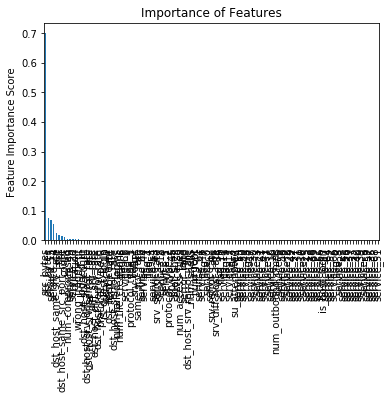

In [39]:
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt
predictors=list(X_train)
feat_imp = pd.Series(gbm.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(gbm.score(X_test, y_test)))
pred=gbm.predict(X_test)
print(classification_report(y_test, pred))

### XG Boost

In [40]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=1000)
xgb.fit(X_train,y_train)
print('Train Result:{}'.format(xgb.score(X_train, y_train)))
print('Test Result:{}'.format(xgb.score(X_test, y_test)))
print('Test Result:{}'.format(xgb.score(X_test21, y_test21)))

Train Result:0.9998571122383367
Test Result:0.7887686302342086
Test Result:0.5981434599156118


In [33]:
from sklearn.model_selection import GridSearchCV
xgb1=XGBClassifier()
param_grid = {"n_estimators":[1000]}
xgb_gscv = GridSearchCV(xgb1, param_grid, cv=3)
xgb_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(xgb_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(xgb_gscv.score(X_test, y_test)))

Train Result:0.9976185373056131
Test Result:0.7852200141944642


### Light GBM

In [50]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
print('Train Result:{}'.format(lgbm.score(X_train, y_train)))
print('Test Result:{}'.format(lgbm.score(X_test, y_test)))
print('Test21 Result:{}'.format(lgbm.score(X_test21, y_test21)))

Train Result:0.999944432537131
Test Result:0.7858853797019163
Test Result:0.5927426160337552


In [52]:
from sklearn.model_selection import GridSearchCV
lgbm1=LGBMClassifier()
param_grid = {"n_estimators":[100]}
lgbm_gscv = GridSearchCV(lgbm1, param_grid, cv=5)
lgbm_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(lgbm_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(lgbm_gscv.score(X_test, y_test)))
print('Test21 Result:{}'.format(lgbm_gscv.score(X_test21, y_test21)))

Train Result:0.9997697919395426
Test Result:0.7913413768630234
Test21 Result:0.6032067510548523


### Stacking

In [174]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [348]:
SEED=10
def get_models():
    """Generate a library of base learners."""
    cat = cb.CatBoostClassifier()
    bme= BaggingClassifier(tree.DecisionTreeClassifier())
    xg=xgb.XGBClassifier()
    lgbm = lgb.LGBMClassifier(silent=False)
    ada = AdaBoostClassifier()
    gb = GradientBoostingClassifier(n_estimators=500, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=500, max_features=3, random_state=SEED)

    models = {'CATBOOST': cat,
              'XGBOOST': xg,
              'LIGHTGBM': lgbm,
              'ADABOOST': ada,
              'GBM': gb,
              'RANDOM FOREST':rf,
              'BME':bme
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = accuracy_score(y, P.loc[:, m].round())
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [350]:
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Fitting models.
CATBOOST... Learning rate set to 0.065842
0:	learn: 0.5495733	total: 117ms	remaining: 1m 57s
1:	learn: 0.4674469	total: 208ms	remaining: 1m 44s
2:	learn: 0.4102278	total: 294ms	remaining: 1m 37s
3:	learn: 0.3466145	total: 410ms	remaining: 1m 42s
4:	learn: 0.2831823	total: 510ms	remaining: 1m 41s
5:	learn: 0.2561090	total: 594ms	remaining: 1m 38s
6:	learn: 0.2274035	total: 718ms	remaining: 1m 41s
7:	learn: 0.2031198	total: 842ms	remaining: 1m 44s
8:	learn: 0.1814016	total: 948ms	remaining: 1m 44s
9:	learn: 0.1646538	total: 1.04s	remaining: 1m 42s
10:	learn: 0.1514548	total: 1.15s	remaining: 1m 43s
11:	learn: 0.1404176	total: 1.24s	remaining: 1m 41s
12:	learn: 0.1258591	total: 1.35s	remaining: 1m 42s
13:	learn: 0.1170174	total: 1.44s	remaining: 1m 41s
14:	learn: 0.1109626	total: 1.54s	remaining: 1m 41s
15:	learn: 0.1044716	total: 1.63s	remaining: 1m 40s
16:	learn: 0.0934281	total: 1.74s	remaining: 1m 40s
17:	learn: 0.0886333	total: 1.83s	remaining: 1m 39s
18:	learn: 0.085

156:	learn: 0.0221010	total: 15s	remaining: 1m 20s
157:	learn: 0.0220466	total: 15s	remaining: 1m 20s
158:	learn: 0.0220232	total: 15.2s	remaining: 1m 20s
159:	learn: 0.0220047	total: 15.2s	remaining: 1m 19s
160:	learn: 0.0219826	total: 15.3s	remaining: 1m 19s
161:	learn: 0.0219439	total: 15.4s	remaining: 1m 19s
162:	learn: 0.0219144	total: 15.5s	remaining: 1m 19s
163:	learn: 0.0218387	total: 15.6s	remaining: 1m 19s
164:	learn: 0.0217656	total: 15.7s	remaining: 1m 19s
165:	learn: 0.0216731	total: 15.8s	remaining: 1m 19s
166:	learn: 0.0215970	total: 15.9s	remaining: 1m 19s
167:	learn: 0.0215189	total: 16s	remaining: 1m 19s
168:	learn: 0.0213705	total: 16.1s	remaining: 1m 19s
169:	learn: 0.0213045	total: 16.2s	remaining: 1m 19s
170:	learn: 0.0212728	total: 16.3s	remaining: 1m 19s
171:	learn: 0.0212296	total: 16.4s	remaining: 1m 18s
172:	learn: 0.0211052	total: 16.5s	remaining: 1m 18s
173:	learn: 0.0210451	total: 16.6s	remaining: 1m 18s
174:	learn: 0.0209856	total: 16.7s	remaining: 1m 18s

315:	learn: 0.0166467	total: 29.7s	remaining: 1m 4s
316:	learn: 0.0166353	total: 29.8s	remaining: 1m 4s
317:	learn: 0.0166310	total: 29.9s	remaining: 1m 4s
318:	learn: 0.0166109	total: 30s	remaining: 1m 4s
319:	learn: 0.0165733	total: 30.1s	remaining: 1m 3s
320:	learn: 0.0165602	total: 30.2s	remaining: 1m 3s
321:	learn: 0.0165476	total: 30.3s	remaining: 1m 3s
322:	learn: 0.0165302	total: 30.4s	remaining: 1m 3s
323:	learn: 0.0165175	total: 30.5s	remaining: 1m 3s
324:	learn: 0.0164915	total: 30.6s	remaining: 1m 3s
325:	learn: 0.0164665	total: 30.7s	remaining: 1m 3s
326:	learn: 0.0164343	total: 30.7s	remaining: 1m 3s
327:	learn: 0.0164090	total: 30.9s	remaining: 1m 3s
328:	learn: 0.0163880	total: 30.9s	remaining: 1m 3s
329:	learn: 0.0163797	total: 31s	remaining: 1m 3s
330:	learn: 0.0163525	total: 31.1s	remaining: 1m 2s
331:	learn: 0.0163298	total: 31.2s	remaining: 1m 2s
332:	learn: 0.0163263	total: 31.3s	remaining: 1m 2s
333:	learn: 0.0163173	total: 31.4s	remaining: 1m 2s
334:	learn: 0.01

476:	learn: 0.0140300	total: 44.8s	remaining: 49.1s
477:	learn: 0.0140194	total: 44.9s	remaining: 49s
478:	learn: 0.0140166	total: 45s	remaining: 49s
479:	learn: 0.0140085	total: 45.1s	remaining: 48.9s
480:	learn: 0.0140001	total: 45.2s	remaining: 48.8s
481:	learn: 0.0139854	total: 45.3s	remaining: 48.7s
482:	learn: 0.0139724	total: 45.4s	remaining: 48.6s
483:	learn: 0.0139706	total: 45.5s	remaining: 48.5s
484:	learn: 0.0139564	total: 45.6s	remaining: 48.4s
485:	learn: 0.0139513	total: 45.6s	remaining: 48.3s
486:	learn: 0.0139310	total: 45.7s	remaining: 48.2s
487:	learn: 0.0139267	total: 45.8s	remaining: 48.1s
488:	learn: 0.0139244	total: 45.9s	remaining: 48s
489:	learn: 0.0139098	total: 46s	remaining: 47.9s
490:	learn: 0.0138999	total: 46.1s	remaining: 47.8s
491:	learn: 0.0138947	total: 46.2s	remaining: 47.7s
492:	learn: 0.0138788	total: 46.3s	remaining: 47.6s
493:	learn: 0.0138642	total: 46.4s	remaining: 47.5s
494:	learn: 0.0138582	total: 46.5s	remaining: 47.4s
495:	learn: 0.0138511	

635:	learn: 0.0126805	total: 59.8s	remaining: 34.2s
636:	learn: 0.0126694	total: 59.9s	remaining: 34.1s
637:	learn: 0.0126636	total: 60s	remaining: 34s
638:	learn: 0.0126552	total: 1m	remaining: 33.9s
639:	learn: 0.0126517	total: 1m	remaining: 33.8s
640:	learn: 0.0126474	total: 1m	remaining: 33.7s
641:	learn: 0.0126457	total: 1m	remaining: 33.6s
642:	learn: 0.0126327	total: 1m	remaining: 33.5s
643:	learn: 0.0126249	total: 1m	remaining: 33.4s
644:	learn: 0.0126188	total: 1m	remaining: 33.4s
645:	learn: 0.0126059	total: 1m	remaining: 33.3s
646:	learn: 0.0126030	total: 1m	remaining: 33.2s
647:	learn: 0.0125978	total: 1m	remaining: 33.1s
648:	learn: 0.0125966	total: 1m	remaining: 33s
649:	learn: 0.0125856	total: 1m 1s	remaining: 32.9s
650:	learn: 0.0125774	total: 1m 1s	remaining: 32.8s
651:	learn: 0.0125671	total: 1m 1s	remaining: 32.7s
652:	learn: 0.0125620	total: 1m 1s	remaining: 32.6s
653:	learn: 0.0125547	total: 1m 1s	remaining: 32.5s
654:	learn: 0.0125473	total: 1m 1s	remaining: 32.4s

794:	learn: 0.0118764	total: 1m 16s	remaining: 19.8s
795:	learn: 0.0118759	total: 1m 16s	remaining: 19.7s
796:	learn: 0.0118743	total: 1m 16s	remaining: 19.6s
797:	learn: 0.0118704	total: 1m 17s	remaining: 19.5s
798:	learn: 0.0118635	total: 1m 17s	remaining: 19.4s
799:	learn: 0.0118617	total: 1m 17s	remaining: 19.3s
800:	learn: 0.0118484	total: 1m 17s	remaining: 19.2s
801:	learn: 0.0118423	total: 1m 17s	remaining: 19.1s
802:	learn: 0.0118289	total: 1m 17s	remaining: 19s
803:	learn: 0.0118276	total: 1m 17s	remaining: 18.9s
804:	learn: 0.0118199	total: 1m 17s	remaining: 18.8s
805:	learn: 0.0118174	total: 1m 17s	remaining: 18.7s
806:	learn: 0.0118151	total: 1m 17s	remaining: 18.6s
807:	learn: 0.0118140	total: 1m 17s	remaining: 18.5s
808:	learn: 0.0118114	total: 1m 18s	remaining: 18.4s
809:	learn: 0.0118101	total: 1m 18s	remaining: 18.3s
810:	learn: 0.0118072	total: 1m 18s	remaining: 18.2s
811:	learn: 0.0117982	total: 1m 18s	remaining: 18.1s
812:	learn: 0.0117954	total: 1m 18s	remaining: 1

952:	learn: 0.0112867	total: 1m 31s	remaining: 4.51s
953:	learn: 0.0112849	total: 1m 31s	remaining: 4.42s
954:	learn: 0.0112832	total: 1m 31s	remaining: 4.32s
955:	learn: 0.0112754	total: 1m 31s	remaining: 4.22s
956:	learn: 0.0112639	total: 1m 31s	remaining: 4.13s
957:	learn: 0.0112588	total: 1m 31s	remaining: 4.03s
958:	learn: 0.0112523	total: 1m 32s	remaining: 3.94s
959:	learn: 0.0112423	total: 1m 32s	remaining: 3.84s
960:	learn: 0.0112406	total: 1m 32s	remaining: 3.74s
961:	learn: 0.0112377	total: 1m 32s	remaining: 3.65s
962:	learn: 0.0112345	total: 1m 32s	remaining: 3.55s
963:	learn: 0.0112327	total: 1m 32s	remaining: 3.46s
964:	learn: 0.0112293	total: 1m 32s	remaining: 3.36s
965:	learn: 0.0112191	total: 1m 32s	remaining: 3.26s
966:	learn: 0.0112185	total: 1m 32s	remaining: 3.17s
967:	learn: 0.0112118	total: 1m 32s	remaining: 3.07s
968:	learn: 0.0112107	total: 1m 33s	remaining: 2.98s
969:	learn: 0.0112091	total: 1m 33s	remaining: 2.88s
970:	learn: 0.0112084	total: 1m 33s	remaining:

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [134]:
print("Ensemble ROC-AUC score: %.3f" % accuracy_score(y_test, P.mean(axis=1)))

In [150]:
base_learners = get_models()

TypeError: score_models() got an unexpected keyword argument 'normalize'

In [ ]:
meta_learner = cb.CatBoostClassifier(
    n_estimators=1000,
    random_state=SEED)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(
    x_train, y_train, test_size=0.3, random_state=SEED)

In [ ]:
def train_base_learners(base_learners, inp, out, verbose=True):
    """
    Train all base learners in the library.
    """
    if verbose: print("Fitting models.")
    for i, (name, m) in enumerate(base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        m.fit(inp, out)
        if verbose: print("done")

In [ ]:
train_base_learners(base_learners, xtrain_base, ytrain_base)

In [ ]:
def predict_base_learners(pred_base_learners, inp, verbose=True):
    """
    Generate a prediction matrix.
    """
    P = np.zeros((inp.shape[0], len(pred_base_learners)))

    if verbose: print("Generating base learner predictions.")
    for i, (name, m) in enumerate(pred_base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        p = m.predict_proba(inp)
        # With two classes, need only predictions for one class
        P[:, i] = p[:, 1]
        if verbose: print("done")

    return P

In [ ]:
P_base = predict_base_learners(base_learners, xpred_base)

In [ ]:
meta_learner.fit(P_base, ypred_base)

In [ ]:
def ensemble_predict(base_learners, meta_learner, inp, verbose=True):
    """
    Generate predictions from the ensemble.
    """
    P_pred = predict_base_learners(base_learners, inp, verbose=verbose)
    return P_pred, meta_learner.predict_proba(P_pred)[:, 1]

In [ ]:
P_pred, p = ensemble_predict(base_learners, meta_learner, x_validate)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(y_validate, p))

In [ ]:
from sklearn.base import clone

def stacking(base_learners, meta_learner, X, y, generator):
    """Simple training routine for stacking."""

    # Train final base learners for test time
    print("Fitting final base learners...", end="")
    train_base_learners(base_learners, X, y, verbose=False)
    print("done")

    # Generate predictions for training meta learners
    # Outer loop:
    print("Generating cross-validated predictions...")
    cv_preds, cv_y = [], []
    for i, (train_idx, test_idx) in enumerate(generator.split(X)):

        fold_xtrain, fold_ytrain = X[train_idx, :], y[train_idx]
        fold_xtest, fold_ytest = X[test_idx, :], y[test_idx]

        # Inner loop: step 4 and 5
        fold_base_learners = {name: clone(model)
                              for name, model in base_learners.items()}
        train_base_learners(
            fold_base_learners, fold_xtrain, fold_ytrain, verbose=False)

        fold_P_base = predict_base_learners(
            fold_base_learners, fold_xtest, verbose=False)

        cv_preds.append(fold_P_base)
        cv_y.append(fold_ytest)
        print("Fold %i done" % (i + 1))

    print("CV-predictions done")

    # Be careful to get rows in the right order
    cv_preds = np.vstack(cv_preds)
    cv_y = np.hstack(cv_y)

    # Train meta learner
    print("Fitting meta learner...", end="")
    meta_learner.fit(cv_preds, cv_y)
    print("done")

    return base_learners, meta_learner

In [ ]:
from sklearn.model_selection import KFold

# Train with stacking
cv_base_learners, cv_meta_learner = stacking(
    get_models(), clone(meta_learner), x_train.values, y_train.values, KFold(2))

In [ ]:
P_pred, p = ensemble_predict(cv_base_learners, cv_meta_learner, x_validate, verbose=False)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(y_validate, p))

In [351]:
X_train.shape

(125973, 56)

### MLENS

In [293]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [294]:
SEED=10
def get_models():
    """Generate a library of base learners."""
    #cat = cb.CatBoostClassifier()
    xg=xgb.XGBClassifier()
    lgbm = lgb.LGBMClassifier(silent=False)
    ada = AdaBoostClassifier()
    gb = GradientBoostingClassifier( random_state=SEED)

    models = {#'CATBOOST': cat,
              'XGBOOST': xg,
              'LIGHTGBM': lgbm,
              'ADABOOST': ada,
              'GBM': gb
              }

    return models

In [295]:
base_learners = get_models()

In [296]:
meta_learner =cb.CatBoostClassifier(random_state=SEED)

In [297]:
from mlens.ensemble import SuperLearner
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing")

In [298]:
sl.add(list(base_learners.values()), proba=True)
sl.add_meta(meta_learner, proba=True)

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=1289, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-5', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=10, sample_size=20, scorer=None, shuffle=False,
       verbose=2)

In [ ]:
# Train the ensemble
sl.fit(X_train, y_train)


Fitting 2 layers
Processing layer-1             

In [301]:
# Predict the test set
p_sl = sl.predict_proba(X_test)


Predicting 2 layers
Processing layer-1             done | 00:00:10
Processing layer-2             done | 00:00:02
Predict complete                    | 00:00:14


In [302]:
print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test, p_sl[:, 1]))
print("\nSuper Learner Accuracy score: %.3f" % accuracy_score(y_test, p_sl[:, 1].round()))


Super Learner ROC-AUC score: 0.957

Super Learner Accuracy score: 0.786


In [183]:
p_sl1 = sl.predict_proba(X_test21)
print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test21, p_sl1[:, 1]))
print("\nSuper Learner Accuracy score: %.3f" % accuracy_score(y_test21, p_sl1[:, 1].round()))


Predicting 2 layers
Processing layer-1             done | 00:00:12
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:14

Super Learner ROC-AUC score: 0.714

Super Learner Accuracy score: 0.621
